# Trabajo Final Semana 2

## Analisis al entorno de los campus del New Bronswick Comunity College
### Elaborado: Bismar Bermeo

Se obtendrá los lugares de interés cercanos a los campus del New Bronswick Comunity College para realizar una\
camparativa de manera que esta información sirva a los interesados como futuros alumnos o inversionistas.


In [3]:
import requests # librería para manejar las solicitudes
import pandas as pd # librería para análisis de datos
import numpy as np # librería para manejar datos vectorizados
import random # librería para generar números aleatorios

!pip install geopy
from geopy.geocoders import Nominatim # módulo para convertir una dirección en valores de latitud y longitud 

# librerías para mostrar imágenes 
from IPython.display import Image 
from IPython.core.display import HTML 
    
# librería para convertir un archivo json en un dataframe pandas
from pandas.io.json import json_normalize

#! pip install folium==0.5.0
##! pip install geocoder

import folium # librería para graficar 

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
#Como datos referenciales tomaremos inicialmente la ubicacion de la capital'
address = 'Fredericton' 

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

In [4]:
#Se recolecto mediante el google maps las coordenadas de cada uno de los campus y se creo un archivo CSV con dicha
#informacion de manera que luego sea accesible en un dataframe mediante el indice
coordenadas = pd.read_csv('TrabajoFinalCapstoneCoordenadasNBCC.csv')
coordenadas.head(10)

,Campus,Latitud,Longitud
0,NBCC Fredericton,45.947068,-66.644382
1,NBCC Moncton,46.108091,-64.829347
2,NBCC Miramichi,47.028173,-65.466482
3,NBCC St Andrews,45.077800,-67.054616
4,NBCC Saint John Grandview,45.286812,-65.993679
5,NBCC Woodstock,46.152842,-67.576219


In [17]:
#Ser crea un dataframe en blanco con la estructura en la que se van a guardar los datos clasificados de cada campus
#en un solo dataframe para su posterior analisis

Columnas = ['Campus','Nombre','Tipo','Latitud','Longitud']
df_servicios = pd.DataFrame(columns=Columnas)
df_servicios_todos = pd.DataFrame(columns=Columnas)
df_servicios

,Campus,Nombre,Tipo,Latitud,Longitud


In [15]:
#Desde la API de foursquare se obtendran los lugares de interes cercanos a los campus del 0 al 5 del dataframe coordenadas
#se obtendran los datos a un radio de 2Km y no se va a discrimiar el tipo de lugar
#una vez obtenido el JSON se convertira en el Objeto RESULTADOS que contendra la categiria results.

import pprint
import json, requests

primer_registro = coordenadas.iloc[0] 
campo_campus = primer_registro['Campus']
campo_latitud = primer_registro['Latitud']
campo_longitud = primer_registro['Longitud']

campus =  primer_registro['Campus']
V = '20230424'
LIMIT = 5 #como ejemplo para que no se llene la hoja vamos aponer solo 5 lugares, para el proyecto no tiene limites
radius = 2000
Squery = 'Pharmacies'  #&query={} No se va a aplicar el filtro
latC = primer_registro['Latitud']
lonC = primer_registro['Longitud']

url = 'https://api.foursquare.com/v3/places/search?&ll={},{}&radius={}&limit={}'.format(
            latC, 
            lonC, 
            radius, 
            LIMIT,        
            )


headers = {
        'Accept': 'application/json',
        'Authorization': 'fsq3WQJyBkI/03QHyC5tZWgHVa91kc4PWFM00tY/e9lD31s='
    }

data = requests.request("GET",url, headers=headers)
data_dict = json.loads(data.text)
data_dict['results']
resultados = data_dict['results']
resultados

[{'fsq_id': '4b7ac93ef964a520b53c2fe3',
  'categories': [{'id': 13018,
    'name': 'Pub',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
     'suffix': '.png'}},
   {'id': 13065,
    'name': 'Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'}}],
  'chains': [],
  'distance': 279,
  'geocodes': {'main': {'latitude': 45.945306, 'longitude': -66.641587},
   'roof': {'latitude': 45.945306, 'longitude': -66.641587}},
  'link': '/v3/places/4b7ac93ef964a520b53c2fe3',
  'location': {'address': '21 Pacey Dr',
   'address_extended': '# 126',
   'country': 'CA',
   'formatted_address': '21 Pacey Dr, Fredericton NB E3B 5A3',
   'locality': 'Fredericton',
   'po_box': 'PO Box 4400',
   'postcode': 'E3B 5A3',
   'region': 'NB'},
  'name': 'The Cellar Pub & Grill',
  'related_places': {},
  'timezone': 'America/Moncton'},
 {'fsq_id': '4dc29f89d4c07da169fbf84b',
  'categories': [{'id': 13032,
    'name': '

In [18]:
# Con el JSON "resultados" se lo va a recorrer y cada lugar obtenido se lo va a incluir en un DataFrame para
# los análisis que a continuación se van a ir realizando

for resultado in resultados:
    try:
        name = resultado['name']
        latitude = resultado['geocodes']['main']['latitude']
        longitude = resultado['geocodes']['main']['longitude']
        category_name = resultado['categories'][0]['name']
        df_servicios.loc[len(df_servicios)] = [campus, name, category_name, latitude, longitude]
        
    except Exception as e:
        print("Error al procesar un resultado:", e)

df_servicios 

,Campus,Nombre,Tipo,Latitud,Longitud
0,NBCC Fredericton,The Cellar Pub & Grill,Pub,45.945306,-66.641587
1,NBCC Fredericton,Tim Hortons,"Cafe, Coffee, and Tea House",45.944655,-66.645162
2,NBCC Fredericton,Grad House,Pub,45.948410,-66.643869
3,NBCC Fredericton,The Richard J. CURRIE Center - UNB,Sports and Recreation,45.946530,-66.638134
4,NBCC Fredericton,Tim Hortons,"Cafe, Coffee, and Tea House",45.945243,-66.641449


In [127]:
# Agregar los nuevos registros al DataFrame existente esto se va a realizar de 0 a 5 segun el 
# Dataframe coordenadas donde estan los campus con sus ubicaciones

df_servicios_todos = pd.concat([df_servicios_todos, df_servicios], ignore_index=True)
df_servicios_todos

,Campus,Nombre,Tipo,Latitud,Longitud
0,NBCC Fredericton,Preschool Centre,Daycare,45.947553,-66.645141
1,NBCC Fredericton,The Cellar Pub & Grill,Pub,45.945306,-66.641587
2,NBCC Fredericton,Tim Hortons,"Cafes, Coffee, and Tea Houses",45.944655,-66.645162
3,NBCC Fredericton,Grad House,Pub,45.948410,-66.643869
4,NBCC Fredericton,The Richard J. CURRIE Center - UNB,Sports and Recreation,45.946530,-66.638134
...,...,...,...,...,...
274,NBCC Woodstock,The Cash Store,Loans Agency,46.150117,-67.573980
275,NBCC Woodstock,K-Line Construction Ltd,General Contractor,46.150117,-67.573980
276,NBCC Woodstock,Western Valley P R O Kids,Youth Organization,46.150114,-67.573883
277,NBCC Woodstock,Dollarama,Discount Store,46.150484,-67.573015


In [ ]:
# Para en lo consiguiente se guarda este Dataframe en un tipo .CSV acumulado con los 6 campus en detalle 
df_servicios_todos.to_csv('ServiciosPorCampusCsv.csv', index=False)

In [ ]:
# Se cargan las librerias de los graficos
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para estilo tipo ggplot

# revisar la última versión de Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [161]:
# A modo de consulta y revision mostramos los lugares de interes agrupados por categorias del ultimo campus
ServiciosPorCampusDF = pd.read_csv('ServiciosPorCampusCsv.csv', sep=';')
Servicios0 = ServiciosPorCampusDF.loc[ServiciosPorCampusDF['Campus'] == CampusVal.Campus]
Servicios0.head(10)

,Campus,Clase,Cantidad
49,NBCC Woodstock,Bank/Serv.Finan,6
50,NBCC Woodstock,Bar,1
51,NBCC Woodstock,Car/Mechanical,1
52,NBCC Woodstock,Construction,2
53,NBCC Woodstock,Culture,1
54,NBCC Woodstock,Food,6
55,NBCC Woodstock,Health Beauty Serv.,4
56,NBCC Woodstock,Recreation,3
57,NBCC Woodstock,Serv. Law Gob,11
58,NBCC Woodstock,Store,10


In [7]:
# De todas las categorias se las agrupo en 14 y adicionalmente se le asigna un codigo de color para que tanto 
# en las grafias de barras como en los mapas mantenga los mismos colores y facilite la lectura de los mismos
ServiciosTablaDF = pd.read_csv('ServiciosTablaCsv.csv', sep=';')
columnas_seleccionadas = [ServiciosTablaDF.columns[0], ServiciosTablaDF.columns[-1]]
df_columnas_seleccionadas = ServiciosTablaDF[columnas_seleccionadas]
df_columnas_seleccionadas

,Clase,Color
0,Bank/Serv.Finan,black
1,Bar,grey
2,Car/Mechanical,lightgrey
3,Construction,rosybrown
4,Culture,maroon
5,Daycare,salmon
6,Drugstore,sandybrown
7,Food,wheat
8,Gas,gold
9,Health Beauty Serv.,yellow


In [162]:
# Con los datos se ha realizado una tabla curzada de clases de Categorias y Campus con la suma como resumen
# y poder obtener los grafias de barras desde una sola fuente de datos solo cambiando el indice de la columna.

ServiciosTablaDF = pd.read_csv('ServiciosTablaCsv.csv', sep=';')
ServiciosTablaDF.head(15)

,Clase,NBCC Fredericton,NBCC Moncton,NBCC Miramichi,NBCC St Andrews,NBCC Saint John Grandview,NBCC Woodstock,Color
0,Bank/Serv.Finan,1,3,2,3,0,6,black
1,Bar,6,1,1,3,0,1,grey
2,Car/Mechanical,0,1,0,0,5,1,lightgrey
3,Construction,0,1,1,2,7,2,rosybrown
4,Culture,2,0,1,3,0,1,maroon
5,Daycare,2,0,0,0,0,0,salmon
6,Drugstore,1,1,2,2,0,0,sandybrown
7,Food,22,14,10,11,2,6,wheat
8,Gas,0,1,1,0,0,0,gold
9,Health Beauty Serv.,0,7,5,2,5,4,yellow


In [163]:
# Cargar el archivo csv con las coordenadas de los campus de New Bronswick Colleges y haciendo un join con 
# el archivo de clases agrupadas y el color para los que los mapas muestren los mismos colores
ClasesDf = ServiciosTablaDF.iloc[:, [0, 7]]

ServiciosDF = pd.read_csv('ServiciosCsv.csv', sep=';')
ServiciosDet = ServiciosDF.loc[ServiciosDF['Campus'] == CampusVal.Campus]
ServiciosDetDF = pd.merge(ServiciosDet, ClasesDf, on='Clase')
ServiciosDetDF.head(5)

,Campus,Nombre,Tipo,Clase,Latitud,Longitud,Color
0,NBCC Woodstock,TD Bank Financial Group,Bank,Bank/Serv.Finan,46.151924,-67.573500,black
1,NBCC Woodstock,TD Bank Financial Group,Bank,Bank/Serv.Finan,46.151921,-67.573403,black
2,NBCC Woodstock,BMO Bank of Montreal,Bank,Bank/Serv.Finan,46.150487,-67.573112,black
3,NBCC Woodstock,RBC Royal Bank,ATM,Bank/Serv.Finan,46.146871,-67.573975,black
4,NBCC Woodstock,Frontgate Financial Group,Financial Planner,Bank/Serv.Finan,46.150938,-67.572968,black


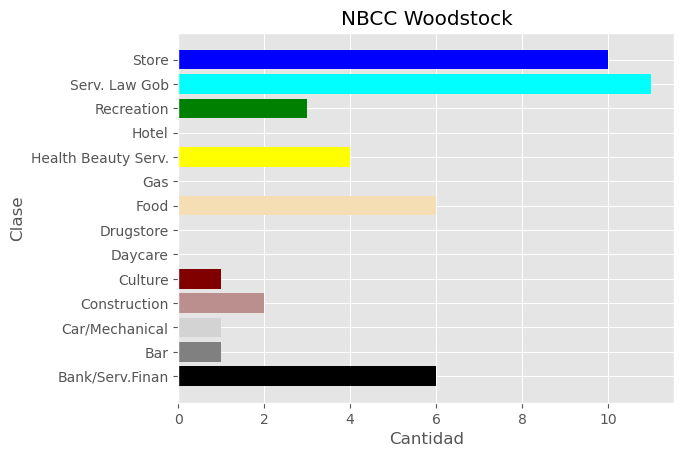

In [164]:
# En esta celda se genera un grafico de las 14 clasificaciones y las cantidades por campus
# con esta variable "Localidad+1" se van a obtener los 6 graficos de cada campus:
#       plt.barh(ServiciosTablaDF['Clase'], ServiciosTablaDF.iloc[:, Localidad+1], color=colores)

colores = ServiciosTablaDF['Color'].tolist()
plt.barh(ServiciosTablaDF['Clase'], ServiciosTablaDF.iloc[:, Localidad+1], color=colores)

plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.title(CampusVal.Campus)
plt.show()

In [ ]:
# Con esta Celda se generará los graficos de los 6 campus, esto constará en el informe
# Esta es la linea que va a cambiar el valor "CampusVal.Campus" para seleccionar las localidades del campus
#     ServiciosDet = ServiciosDF.loc[ServiciosDF['Campus'] == CampusVal.Campus] 

latitudeV = CampusVal.Latitud
longitudeV = CampusVal.Longitud
venues_map = folium.Map(location=[latitudeV, longitudeV], zoom_start=13) # generate map centred around Ecco

# Añadir Ecco como una marca circular roja
folium.CircleMarker(
    [latitudeV, longitudeV],
    radius=10,
    popup=CampusVal.Campus,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# añadir sitios populares al mapa como marcas circulares que correspondan a su tipo clasificado
for lat, lng, label, ColorT in zip(ServiciosDetDF.Latitud, ServiciosDetDF.Longitud, ServiciosDetDF.Nombre, ServiciosDetDF.Color):
    #print(lat, lng, label)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        fill=True,
        color='black',
        fill_color=ColorT,
        fill_opacity=0.9
        ).add_to(venues_map)

# mostrar mapa
venues_map

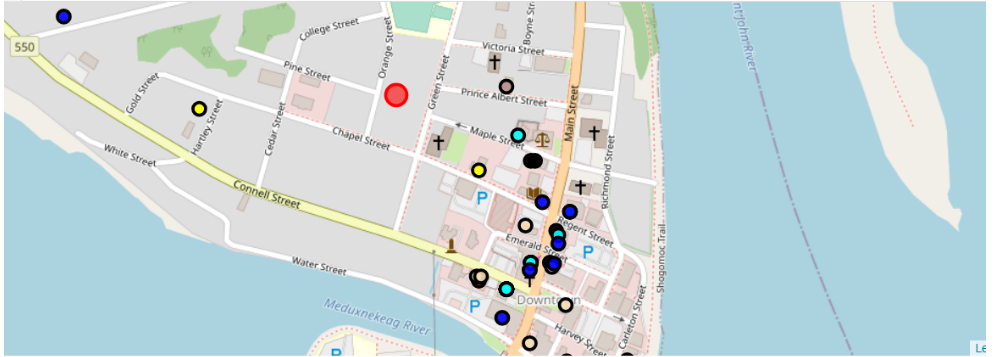

In [ ]:
# El resto de los 5 mapas y graficos ha sido generados e incluidos en el informe